## Part 1: Modeling COVID-19 by continuum dynamical system : SIER system by differential equations

### 1. SIR model
Different from most infectious dieases, the COVID-19 has a very long incubation period, which can be up to 14 days. During the incubation periods, the patients have no serve symptom, or even no symptom at all, but are still able to deliver the virus to susceptibles. Thus, a traditional susceptible-infected-recovered (SIR) model may not strictly describe the spread of COVID-19. Thus, we introduce the susceptible-exposed-infected-recovered (SEIR) model to simulate the circumstances of the pandemic. 

We start from the very basic SIR model. In the SIR model, each individual has three distinct states: susceptible, infected, and recovered states. At the very begining, a few individuals in the pool are already infectious, which can be regarded as the seed of the spread, and all the rests are susceptibles. As the spread proceeds, some close contacts of the infectious are infected unfortunately, and the probability of the infection reflects the capbility of the spreading. Some infectious will recover and get the immunity and never get infected any more, while some will loss their lives. However, since the dead cases will no longer affect the distribution of S, I and R groups, and since the fatality rate is not too high to change the overall population, we will not take the death into our model. 

The continuum model, which is the 'mean field' model, will only care about the overall density of the S, I and R groups without taking a close look at the exact states of individuals. Then, the continuum model will provide a general idea of the spread, so it is a handy method to model a huge population and get the mean behaviour of the spread. On the contrary, since the model is a over-simplified dynamical system, it is not straightforward to describe every details of the real world. Compared with other two methods of our study, the Markov chain and the cellular automaton methods, the dynamical system is not bounded by the size of the pool, which is easily scalable with acceptable compuytational expenses. For another, this method cannot model each cells in the system, so it is not always precise. 

In SIR model, we first need to define a time-dependent variable for S, I and R state, and the variables are the fraction of the states in the overall population. That is, let

- $S_t$ be the fraction of the population that is susceptible at time $t$;
- $I_t$ be the fraction that is infected at $t$; and
- $R_t$ be the fraction that is recovered at $t$,

where $S_t + I_t + R_t = 1$. 

Besides, there are fundamental parameters defined to describe the behaviour of the virus

- $I_t S_t$ measures the fraction of total encounters that can cause disease transmission;
- $\tau$ is a parameter that represents the fraction (or probability) of such encounters transmitting disease in any time step; and
- $\frac{1}{\kappa}$ is a parameter that represents the fraction (probability) of infected individuals recovering in any time step.

Thus, we can formulate the system as a group of differential euqations, and S, I, R are collectively regarded as a vector:
$$
\begin{eqnarray}
  \dfrac{d\vec{y}}{dt}
  = \dfrac{d}{dt}\left(\begin{matrix}
      S(t) \\
      I(t) \\
      R(t)
    \end{matrix}\right)
  & = & \left(\begin{matrix}
      - \tau_0 I(t) S(t) \\
      \tau_0 S(t) (It) - \dfrac{1}{\kappa_0} I(t) \\
      \dfrac{1}{\kappa_0} I(t)
    \end{matrix}\right)
  \equiv \vec{F}(\vec{y}),
\end{eqnarray}
$$

where $\vec{y}(t)$ is the state vector and both $\tau_0$ and $\kappa_0$ are now rate parameters, having units of "fractions per unit time."

### 2. Extension to SEIR model

Since COVID-19 has a very long incubation period, which makes it hard to handle. And the no-symptom patients is one of the major channel of the spread of the virus. To model the incubation peroid, we introduce another state, exposed (E), to the SIR model, and the modified system is the so-called SEIR model.

In SEIR model, the patients who get the virus will first get into the Exposed state. Then, part of the exposed patients will show symptoms and turn to the Infectious state. We use the parameter $\sigma_0$ to model the transition. Then, the system can be describe as

$$
\begin{eqnarray}
  \dfrac{d\vec{y}}{dt}
  = \dfrac{d}{dt}\left(\begin{matrix}
      S(t) \\
      E(t) \\
      I(t) \\
      R(t)
    \end{matrix}\right)
  & = & \left(\begin{matrix}
      - \tau_0 I(t) S(t) \\
      \tau_0 I(t) S(t)- \sigma_0 E(t) \\
      \sigma_0 E(t) - \dfrac{1}{\kappa_0} I(t) \\
      \dfrac{1}{\kappa_0} I(t)
    \end{matrix}\right)
  \equiv \vec{F}(\vec{y}),
\end{eqnarray}
$$

where $\vec{y}(t)$ is the state vector and both $\tau_0$, $\sigma_0$ and $\kappa_0$ are now rate parameters, having units of "fractions per unit time."

We first define the function to describe the right hand side of the equations, namely E_seir, and we define x as the vector which contains the infomation of the current states. x has three components, S, E and I, and obviously R can be obtained R = 1- S - E - I 

In [16]:
import numpy as np
import matplotlib.pyplot as plt

def F_seir (x, tau, sigma, kappa):
    # x = (s, e, i)
    x_next = x.copy ()
    ### BEGIN SOLUTION
    S, E, I = 0, 1, 2
    x_next[S] = x[S] * ( - tau*x[I])
    x_next[E] = x[S] * tau * x[I] - sigma * x[E]
    x_next[I] = sigma * x[E] + x[I] * ( - 1.0/kappa) 
    ### END SOLUTION
    return x_next

Then the parameters and initial states are set. Here we assume initially some population are already infectious, and all the others are suspectible. Since As for time steps, we assume the time evenly distributed between 0 and 31, which means our simulation is to reflect the conditions during one month.

In [100]:
ALPHA = 0.2
TAU = 0.9
KAPPA = 1.25
SIGMA = 5

TAU_0 = TAU
KAPPA_0 = KAPPA
SIGMA_0 = SIGMA

# Initial populations, i.e., [S(0), E(0), I(0), R(0)]
y0 = np.array ([1.0 - ALPHA, 0., ALPHA, 0.])

# Time points at which to compute the solutions:
T = np.arange (60).astype (float)

Once upon all the equations and initial states are predefined, the following task is to solve the equations. Although formidable to human, the differential equations are easily approachable to python differential equation solvers. Here we use ode_int from scipy library. The algrithm of the solver is way beyound the content of this toturial. We only need to treat it as a automatic solver. The input is the vector of current status with explicit parameters, and it will solve for each time step. We define the function F_seir_ode to convey parameters to the solver. It just exactly looks like F_seir, but it is upon to change if we further introduce other modifications

In [101]:
### BEGIN SOLUTION
from scipy.integrate import odeint

############# ode for solving y; here the function is the same as F_seir, but we can hcange that if more functions are needed
def F_seir_ode (y, t, tau0, kappa0, sigma0):
    return F_seir (y, tau0, kappa0, sigma0) 

############### define the initial states
Y = np.zeros ((3, len (T)))
Y[:, 0] = y0[:3]

Y = odeint (F_seir_ode,
            Y[:, 0],
            T,
            args=(TAU_0, KAPPA_0, SIGMA_0)).T

S_ode = Y[0, :]
E_ode = Y[1, :]
I_ode = Y[2, :]
R_ode = 1.0 - S_ode - I_ode - E_ode
### END SOLUTION


Then we define some supporting function to output the solutions of the simulation and visulaization them. Matplotlib is a popular package for plotting, and we can easily observe the results of our results. 

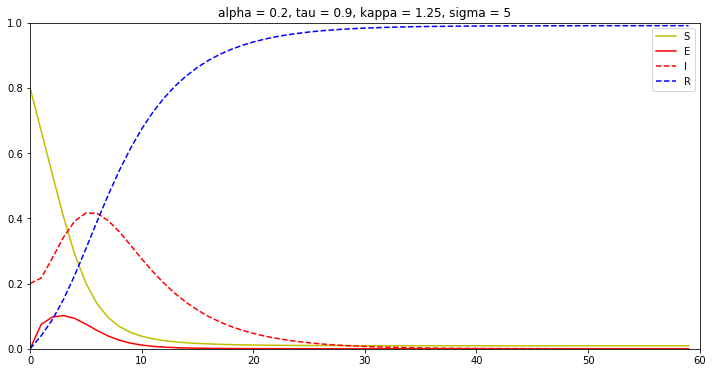

In [102]:
def summarize_sim_ode (S, E, I, T, alpha, tau_0, kappa_0, sigma_0):
    t_max = T[-1]
    print ("ODE simulation parameters:")
    print ("  - t_max = {}".format (t_max))
    print ("  - alpha = {}".format (alpha))
    print ("  - tau_0 = {}".format (tau_0))
    print ("  - kappa_0 = {}".format (kappa_0))
    print ("\nResults:")
    print ("- S_{{{}}} = {:.3f}".format (t_max, S[-1]))
    print ("- E_{{{}}} = {:.3f}".format (t_max, E[-1]))
    print ("- I_{{{}}} = {:.3f}".format (t_max, I[-1]))
    print ("- R_{{{}}} = {:.3f}".format (t_max, 1-S[-1]-I[-1] -E[-1]))
    
#summarize_sim_ode (S_ode, I_ode, T, ALPHA, TAU_0, KAPPA_0)

def plot_sim_ode (S, E, I, T, alpha, tau, kappa, sigma):
    t_max = T[-1]
    use_points = len (T) <= 35
    plt.plot (T, S, 'ys--' if use_points else 'y-')
    plt.plot (T, E, 'r-' if use_points else 'r-')
    plt.plot (T, I, 'r*--' if use_points else 'r--')
    plt.plot (T, 1. - S - I - E, 'bo--' if use_points else 'b--')
    plt.legend (['S', 'E' , 'I', 'R'])
    plt.axis ([0, t_max+1, 0, 1])
    plt.title ("alpha = {}, tau = {}, kappa = {}, sigma = {}".format (alpha, tau, kappa, sigma))
        
# Figure to compare discrete-time and continuous-time models
plt.figure (figsize=(12, 6))
plot_sim_ode (S_ode, E_ode, I_ode, T, ALPHA, TAU_0, KAPPA_0, SIGMA_0)


### 3. Validation the functionality of the SEIR model through real-world data
Upon now, we have finished all the codes for the suimulation and visualization. However, a good simulation is the one that can reflect the conditions of the real world. To test if our model can be used to describe the spread of COVID-19, we need to test it by real world data. 

The first step is to load the real-world. The dataset is loaded from the John Hoplins dataset. We can use a python package, Pandas, to load and manupilate the dataset. Here we define the function preprocess_US, to load and preprocess the data. The data is about the spread conditions in the US. The dataset keeps updated.

The dataset is denoted by states. Here we do not need to distinguish the difference between states, and regard the spread in the U.S. as a whole. The confirmed and dead cases are interested. 

In [134]:
import pandas as pd

def preprocess_US(data_url):
    df = pd.read_csv(data_url)
    last_update_date = df.keys()[-1]
    df.drop(['UID','iso2','iso3','code3','FIPS','Admin2','Lat','Long_'], axis = 1, inplace = True)
    df_cleaned= df.groupby(['Province_State'], as_index = False).sum()
    df_sorted = df_cleaned.sort_values(by=last_update_date,ascending=False).reset_index(drop=True)
    update_total = sum(df_sorted[last_update_date])
    return df_sorted, last_update_date, update_total

### Retrieve data from CSSEGISandData Github Raw content in csv
url_confirmed_US = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv'
url_deaths_US = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_US.csv'


df_confirmed_US,last_confirmed_US,total_confirmed_US = preprocess_US(url_confirmed_US)
df_deaths_US,last_deaths_US,total_deaths_US = preprocess_US(url_deaths_US)
first_date_US = df_confirmed_US.keys()[1]
print("Data Basic Statistics: \n")
print('From {} till {} the US confirmed cases total is : {} \n'.format(first_date_US,last_confirmed_US,total_confirmed_US))
print('From {} till {} the US deaths cases total is : {} \n'.format(first_date_US,last_deaths_US,total_deaths_US))
mortality_rate = float(total_deaths_US)/float(total_confirmed_US)*100
print('Mortality rate in US is being updated as {:.3f}% \n'.format(mortality_rate))
US_population_list = df_deaths_US['Population']
US_population = US_population_list.sum()
df_deaths_US.drop(['Population'], axis = 1, inplace = True)
print('COVID-19 is among US population of {:.5f}% \n'.format(float(total_confirmed_US)/float(US_population)*100))

################### change the dataframe into numpy array for manuniplation
df_confirmed_US.drop(['Province_State'],axis = 1)
array_allconfirmed = np.flip(np.array(df_confirmed_US.sum(axis = 1)))/float(US_population)
df_deaths_US.drop(['Province_State'],axis = 1)
array_alldeath = np.flip(np.array(df_deaths_US.sum(axis = 1)))/float(US_population)

Data Basic Statistics: 

From 1/22/20 till 4/26/20 the US confirmed cases total is : 965785 

From 1/22/20 till 4/26/20 the US deaths cases total is : 54881 

Mortality rate in US is being updated as 5.683% 

COVID-19 is among US population of 0.28725% 



Here we use the numpy array array_allconfirmed and array_alldeath to represent the data of the precentage of confirmed and death cases. The we need to find the best set of parameters in SEIR model which produces the least square between the simulation and the real-world data. There is no closed form way to solve the SEIR equations since we do not know the recovered and exposed infomation. We can deliver a thorough parameter-sweep to select out the best parameters. To do this, we can conduct nested for-loop to scan the parameter spaces. It is not a very efficient way, but it is straightforward and gurantees an approximate solution.

As for the initial steup, we can set ALPHA as 2e-8, which means at the begining of the speard, only a small faction of people get infected, which serves as the seed of the pandemic. The length of the simulation should be the same as that of the dataset.
The following codes are to search for the best solutions if TAU, KAPPA and SIGMA. Here we scan the three parameters all from 0 to 3, and the step of the scanning is 0.1.

The metric for the scan is the to find the parameters which provides the least squares between the real data and simulated results of confirmed precentage (I). We define variable loss here to store the difference between the data and simulation, and the best parameters is stored in tuple best_paras.

In [130]:
# Initial populations, i.e., [S(0), E(0), I(0), R(0)]
ALPHA = 2e-8
n_days = len(array_alldeath)  # length of the simulation
y0 = np.array ([1.0 - ALPHA, 0., ALPHA, 0.])
T = np.arange (n_days).astype (float)
Y = np.zeros ((3, len (T)))
Y[:, 0] = y0[:3]
step = 0.1
stop = 3
loss = 5

########## the loop for parameter-scanning
for TAU_0 in np.arange(1e-7,stop,step):
    for SIGMA_0 in np.arange(1e-7,stop, step):
        for inv_kappa in np.arange(1e-7,stop,step):
            KAPPA_0 = 1/inv_kappa
            Y = odeint (F_seir_ode,
                        Y[:, 0],
                        T,
                        args=(TAU_0, KAPPA_0, SIGMA_0)).T
            I_ode = Y[2, :]
            #I_ode[:5] = 0
            #print(max(I_ode))
            #print(I_ode)
            curr_loss = np.sum(np.square(array_allconfirmed - I_ode))
            #print(curr_loss)
            if curr_loss < loss:
                loss = curr_loss
                best_paras = [TAU_0, KAPPA_0, SIGMA_0]

Finally, we get the best parameters: TAU_0 = 1.00, KAPPA_0 = 0.34, SIGMA_0 = 2.90; and the comparison between the simulated results and real data of the infected precentage is shown below. The simulated results can really decribe the tendency of the data, which validates the functionality of our simulation model.

best parameters:  [1.0000001, 0.3448275743162905, 2.9000001]


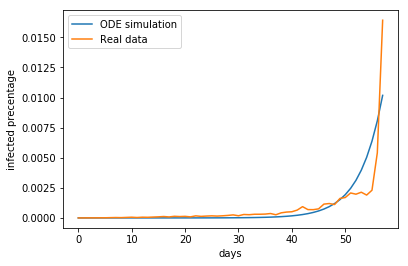

In [132]:
print("best parameters: ", best_paras)
TAU_0 = best_paras[0]
KAPPA_0 = best_paras[1]
SIGMA_0 = best_paras[2]


Y = odeint (F_seir_ode,Y[:, 0],T,args=(TAU_0, KAPPA_0, SIGMA_0)).T
I_ode = Y[2, :]

line_ode, = plt.plot(I_ode, label='ODE simulation')
line_data, = plt.plot(array_allconfirmed, label='Real data')
plt.xlabel('days')
plt.ylabel('infected precentage')
plt.legend(handles=[line_ode, line_data])
plt.show()

Based on the above parameters, we can estimate the whole development of the pandemic, and then the simulation will show a reasonable guidance on the period and spread of the virus. Here we plot the spread for 180 days.

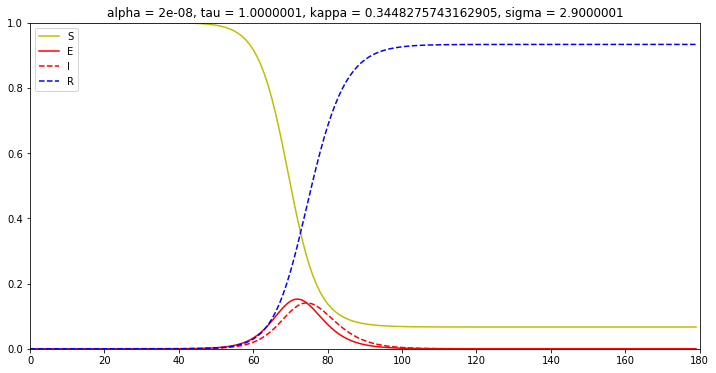

In [133]:
y0 = np.array ([1.0 - ALPHA, 0., ALPHA, 0.])
T = np.arange (180).astype (float)
Y = np.zeros ((3, len (T)))
Y[:, 0] = y0[:3]
Y = odeint (F_seir_ode,Y[:, 0],T,args=(TAU_0, KAPPA_0, SIGMA_0)).T

S_ode = Y[0, :]
E_ode = Y[1, :]
I_ode = Y[2, :]
R_ode = 1.0 - S_ode - I_ode - E_ode
plt.figure (figsize=(12, 6))
plot_sim_ode (S_ode, E_ode, I_ode, T, ALPHA, TAU_0, KAPPA_0, SIGMA_0)

The plot presents that the spread may need 4 month to terminate. We are half way, good luck everyone!

## 4. Conclusion and Discussion
In this part of the toturial, you should master the techniques of applying ODE in Python to solve some dynamical systems. The specific scenario is to apply ODE into analysis of COVID-19. The ODE system is called SEIR model. By solving the SEIR equations and fitting the model with real world data, we got the optimized parameters of the SEIR model. We have predicted the pandemic will come to an end in around 120 days. Keep the social distance, stay home, stay safe!